<a href="https://colab.research.google.com/github/DrewRust/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/U1_S1_Study_Guide_Data_Wrangling_Visualizations_Andrew_Rust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This study guide should reinforce and provide practice for all of the concepts you have seen in the past week. There are a mix of written questions and coding exercises, both are equally important to prepare you for the sprint challenge as well as to be able to speak on these topics comfortably in interviews and on the job.

If you get stuck or are unsure of something remember the 20 minute rule. If that doesn't help, then research a solution with google and stackoverflow. Only once you have exausted these methods should you turn to your Team Lead - they won't be there on your SC or during an interview. That being said, don't hesitate to ask for help if you truly are stuck.

Have fun studying!

# Resources
[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

[Matplotlib Documentation](https://matplotlib.org/3.1.1/api/pyplot_summary.html)

[Pandas EDA Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/Data_Cleaning_and_Exploring_Cheat_Sheet.ipynb)

[Pandas Data Wrangling Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/Data_wrangling_cheatsheet.pdf)

[Matplotlib Cheat Sheet](https://github.com/bundickm/CheatSheets/blob/master/MatplotLib_Cheat_Sheet.ipynb)

# Setup

Import and alias the following libraries:
- numpy
- pandas
- matplot
- seaborn

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Read in the auto data csv below and verify it's contents

In [0]:
auto_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

In [257]:
auto_df = pd.read_csv(auto_url)
auto_df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,168.80,64.10,48.80,2548,dohc,four,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


You should see there are no column headers. Read in the csv with the column names below and then check the first 5 and last 5 rows of the data frame

In [0]:
columns = ['symboling','norm_loss','make','fuel','aspiration','doors',
           'bod_style','drv_wheels','eng_loc','wheel_base','length','width',
           'height','curb_weight','engine','cylinders','engine_size',
           'fuel_system','bore','stroke','compression','hp','peak_rpm',
           'city_mpg','hgwy_mpg','price']

In [259]:
auto_df = pd.read_csv(auto_url, header = None, names=columns)
auto_df.reset_index(drop=True)
auto_df.head()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [260]:
auto_df.tail()

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


In [261]:
# HAS ? marks for empty values.
auto_df.sample(15)

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,169.0,65.7,49.6,2380,rotor,two,70,4bbl,?,?,9.4,101,6000,17,23,11845
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
179,3,197,toyota,gas,std,two,hatchback,rwd,front,102.9,183.5,67.7,52.0,3016,dohc,six,171,mpfi,3.27,3.35,9.3,161,5200,19,24,15998
23,1,118,dodge,gas,turbo,two,hatchback,fwd,front,93.7,157.3,63.8,50.8,2128,ohc,four,98,mpfi,3.03,3.39,7.6,102,5500,24,30,7957
182,2,122,volkswagen,diesel,std,two,sedan,fwd,front,97.3,171.7,65.5,55.7,2261,ohc,four,97,idi,3.01,3.40,23.0,52,4800,37,46,7775
61,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,177.8,66.5,53.7,2385,ohc,four,122,2bbl,3.39,3.39,8.6,84,4800,26,32,10595
184,2,94,volkswagen,diesel,std,four,sedan,fwd,front,97.3,171.7,65.5,55.7,2264,ohc,four,97,idi,3.01,3.40,23.0,52,4800,37,46,7995
158,0,91,toyota,diesel,std,four,sedan,fwd,front,95.7,166.3,64.4,53.0,2275,ohc,four,110,idi,3.27,3.35,22.5,56,4500,34,36,7898
99,0,106,nissan,gas,std,four,hatchback,fwd,front,97.2,173.4,65.2,54.7,2324,ohc,four,120,2bbl,3.33,3.47,8.5,97,5200,27,34,8949


 Check for nulls and any values that may be a placeholder for nulls

In [262]:
# ARE not showing up because there are ? marks instead.
auto_df.isnull().sum()

symboling      0
norm_loss      0
make           0
fuel           0
aspiration     0
doors          0
bod_style      0
drv_wheels     0
eng_loc        0
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine         0
cylinders      0
engine_size    0
fuel_system    0
bore           0
stroke         0
compression    0
hp             0
peak_rpm       0
city_mpg       0
hgwy_mpg       0
price          0
dtype: int64

In [263]:
auto_df['norm_loss'].value_counts().head(20)

?      41
161    11
91      8
150     7
104     6
128     6
134     6
102     5
65      5
103     5
95      5
94      5
85      5
74      5
168     5
148     4
122     4
118     4
93      4
106     4
Name: norm_loss, dtype: int64

In [0]:
# Is there supposed to be a space in front of this ? mark? (The notes have this space?)
# I have to watch the video on this.
auto_df = auto_df.replace('?', np.NaN)

In [265]:
# THIS WORKS TO SEE the nulls now.
auto_df.isnull().sum()

symboling       0
norm_loss      41
make            0
fuel            0
aspiration      0
doors           2
bod_style       0
drv_wheels      0
eng_loc         0
wheel_base      0
length          0
width           0
height          0
curb_weight     0
engine          0
cylinders       0
engine_size     0
fuel_system     0
bore            4
stroke          4
compression     0
hp              2
peak_rpm        2
city_mpg        0
hgwy_mpg        0
price           4
dtype: int64

In [266]:
auto_df.shape

(205, 26)

Replace the placeholders with `NaN` and then recheck for nulls.

In [0]:
# DONE Did this above.  Still need to watch the video.

# Exploration

Find the following information about the dataframe:
- Get the descriptive statistics for ALL features (numeric and categorical)
- Get the data types for all features
- What are the unique values for the `doors` column
- How many rows and columns are in the dataframe?

In [267]:
# ALL OF the ABOVE IS DONE
# I GET THE DATA types for all features on the next objective.
auto_df.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression,city_mpg,hgwy_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [268]:
auto_df.describe(exclude='number')

,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,engine,cylinders,fuel_system,bore,stroke,hp,peak_rpm,price
count,164,205,205,205,203,205,205,205,205,205,205,201,201,203,203,201
unique,51,22,2,2,2,5,3,2,7,7,8,38,36,59,23,186
top,161,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40,68,5500,7957
freq,11,32,185,168,114,96,120,202,148,159,94,23,20,19,37,2


In [269]:
auto_df['doors'].value_counts().head()

four    114
two      89
Name: doors, dtype: int64

In [270]:
auto_df.shape

(205, 26)

In [271]:
auto_df['doors'].nunique()

2

In [272]:
auto_df['doors'].unique()

array(['two', 'four', nan], dtype=object)

# Cleaning and Feature Engineering

Complete the following actions on the dataframe:
- Fill in the null values in the dataframe without dropping any rows or columns
- Convert the `doors` column to `int`
- Drop the `eng_loc` column
- Create a new column in the df that is the `hp` divided by `price`

In [0]:
# Filling the NaN values
values = {'norm_loss': 0, 'doors': 'four', 'bore': 3.0, 'stroke': 3.0, 'hp': 100, 'peak_rpm': 5000, 'price': 15000}
auto_df.fillna(value=values, inplace=True)

In [274]:
auto_df.isnull().sum()

symboling      0
norm_loss      0
make           0
fuel           0
aspiration     0
doors          0
bod_style      0
drv_wheels     0
eng_loc        0
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine         0
cylinders      0
engine_size    0
fuel_system    0
bore           0
stroke         0
compression    0
hp             0
peak_rpm       0
city_mpg       0
hgwy_mpg       0
price          0
dtype: int64

In [275]:
auto_df.dtypes

symboling        int64
norm_loss       object
make            object
fuel            object
aspiration      object
doors           object
bod_style       object
drv_wheels      object
eng_loc         object
wheel_base     float64
length         float64
width          float64
height         float64
curb_weight      int64
engine          object
cylinders       object
engine_size      int64
fuel_system     object
bore            object
stroke          object
compression    float64
hp              object
peak_rpm        object
city_mpg         int64
hgwy_mpg         int64
price           object
dtype: object

In [276]:
auto_df['doors'].dtypes

dtype('O')

In [277]:
auto_df['doors'].value_counts().head()

four    116
two      89
Name: doors, dtype: int64

In [0]:
auto_df['doors'].replace(['two', 'four'], ['2', '4'], inplace=True)

In [279]:
auto_df['doors'].sample(5)

45     4
78     2
42     2
164    2
186    4
Name: doors, dtype: object

In [280]:
# I fixed this above first but below is another way to replace a null with 3 in this case.
# doors has two null values which need to be replaced with an actual value we'll put in 3 which would be the average.
auto_df['doors'].isnull().sum()

0

In [0]:
# I replaced the null value above with 'four' then ultimately an int.
# auto_df['doors'].replace('NaN', '3', inplace=True)

In [141]:
# not getting rid of the null values for some reason!!
# auto_df['doors'].isnull().sum()

0

In [281]:
auto_df.isnull().sum()

symboling      0
norm_loss      0
make           0
fuel           0
aspiration     0
doors          0
bod_style      0
drv_wheels     0
eng_loc        0
wheel_base     0
length         0
width          0
height         0
curb_weight    0
engine         0
cylinders      0
engine_size    0
fuel_system    0
bore           0
stroke         0
compression    0
hp             0
peak_rpm       0
city_mpg       0
hgwy_mpg       0
price          0
dtype: int64

In [282]:
auto_df[auto_df.isnull().any(axis=1)]

,symboling,norm_loss,make,fuel,aspiration,doors,bod_style,drv_wheels,eng_loc,wheel_base,length,width,height,curb_weight,engine,cylinders,engine_size,fuel_system,bore,stroke,compression,hp,peak_rpm,city_mpg,hgwy_mpg,price


In [0]:
# finally this works!!
# the other way to do it would have been to drop all the null values see below:
# auto_df['doors'].dropna(inplace=True)

# UNCOMMENTED OUT BECAUSE WAS FIXED ABOVE
# auto_df.at[27, "doors"] = "3" 
# auto_df.at[63, "doors"] = "3" 

In [283]:
auto_df['doors'].isnull().sum()

0

In [0]:
 # YESS!
 auto_df['doors'] = auto_df['doors'].astype(str).astype(int)

In [285]:
# Finally.
auto_df['doors'].dtypes

dtype('int64')

In [286]:
auto_df['doors'].value_counts().head()

4    116
2     89
Name: doors, dtype: int64

In [287]:
auto_df['doors'].unique()

array([2, 4])

In [288]:
len(auto_df['doors'].unique())

2

In [289]:
auto_df.columns

Index(['symboling', 'norm_loss', 'make', 'fuel', 'aspiration', 'doors',
       'bod_style', 'drv_wheels', 'eng_loc', 'wheel_base', 'length', 'width',
       'height', 'curb_weight', 'engine', 'cylinders', 'engine_size',
       'fuel_system', 'bore', 'stroke', 'compression', 'hp', 'peak_rpm',
       'city_mpg', 'hgwy_mpg', 'price'],
      dtype='object')

In [0]:
# Got to have inplace=True
# axis 1 is columns axis 0 would be rows we want a column dropped.
auto_df.drop('eng_loc', axis=1, inplace=True)

In [291]:
# eng_loc is no longer there (LOOK between drv_wheels and wheel_base it's gone.)
auto_df.columns

Index(['symboling', 'norm_loss', 'make', 'fuel', 'aspiration', 'doors',
       'bod_style', 'drv_wheels', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine', 'cylinders', 'engine_size', 'fuel_system',
       'bore', 'stroke', 'compression', 'hp', 'peak_rpm', 'city_mpg',
       'hgwy_mpg', 'price'],
      dtype='object')

In [292]:
print(auto_df['hp'].dtypes)
auto_df['price'].dtypes

object


dtype('O')

In [0]:
auto_df['hp'] = auto_df['hp'].astype(str).astype(int)
auto_df['price'] = auto_df['price'].astype(str).astype(int)

In [294]:
print(auto_df['hp'].dtypes)
auto_df['price'].dtypes

int64


dtype('int64')

In [328]:
# Create a new column in the df that is the hp divided by price
# Lets make a nother new column that is 'hp' by 'price'
auto_df['hp_divided_by_price'] = auto_df['hp'] / auto_df['price']
# df1 = df[['a','b']]
two_columns = auto_df[['engine', 'hp_divided_by_price']]
two_columns.head()

,engine,hp_divided_by_price
0,dohc,0.008225
1,dohc,0.006727
2,ohcv,0.009333
3,ohc,0.007312
4,ohc,0.006590


In [296]:
# NOW I CAN SEE that there is a new column 'hp_divided_by_price'
auto_df.columns

Index(['symboling', 'norm_loss', 'make', 'fuel', 'aspiration', 'doors',
       'bod_style', 'drv_wheels', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine', 'cylinders', 'engine_size', 'fuel_system',
       'bore', 'stroke', 'compression', 'hp', 'peak_rpm', 'city_mpg',
       'hgwy_mpg', 'price', 'hp_divided_by_price'],
      dtype='object')

What does it mean to engineer a feature?

In [0]:
# Feature Engineering is the way of extracting features from data ..
# .. and transforming them into formats that are suitable for Machine Learning algorithms.
# Has 3 main steps:
# Feature Selection, Feature Transformation, and Feature Extraction. 

What is a `NaN` and why do we care about them?

In [0]:
# NaN stands for "Not a Number" and is the default missing value indicator with Pandas.  
# Look at the data column that has the NaN to better understand it and how to deal with it.
# NaN could also mean that something was not applicable or just not recorded.
# Pandas tries to maintain a specific data type for all values in a column.
# NaN is recorded as type float so if the column has all ints and a NaN it will be recorded and labled all floats to keep the NaN in place.

# Basic Visualizations

Make the following basic graphs with the features in the dataframe:
- Line Plot
- Scatterplot
- Histogram
- Bar Graph
- Density

All graphs should have a title, and label for each axis

In [298]:
auto_df.describe()

,symboling,doors,wheel_base,length,width,height,curb_weight,engine_size,compression,hp,city_mpg,hgwy_mpg,price,hp_divided_by_price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,3.131707,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,104.214634,25.219512,30.751220,13242.112195,0.008824
std,1.245307,0.993715,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,39.521436,6.542142,6.886443,7872.693982,0.002406
min,-2.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,48.000000,13.000000,16.000000,5118.000000,0.003892
25%,0.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,70.000000,19.000000,25.000000,7788.000000,0.007092
50%,1.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,95.000000,24.000000,30.000000,10595.000000,0.009046
75%,2.000000,4.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,116.000000,30.000000,34.000000,16500.000000,0.010378
max,3.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,288.000000,49.000000,54.000000,45400.000000,0.019200


In [0]:
auto_df['curb_weight'] = auto_df['curb_weight'].astype(str).astype(int)
auto_df['city_mpg'] = auto_df['city_mpg'].astype(str).astype(int)
auto_df['hgwy_mpg'] = auto_df['hgwy_mpg'].astype(str).astype(int)

In [300]:
print(auto_df['curb_weight'].dtypes)
print(auto_df['city_mpg'].dtypes)
auto_df['hgwy_mpg'].dtypes

int64
int64


dtype('int64')

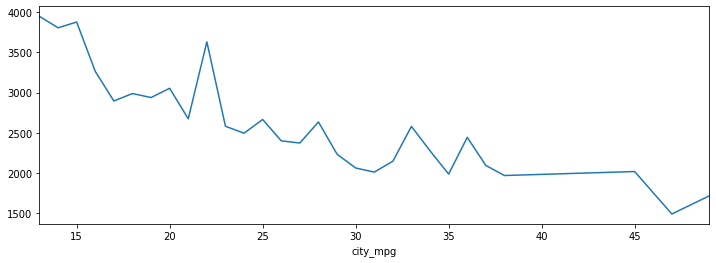

In [301]:
auto_df.groupby('city_mpg')['curb_weight'].mean().plot(figsize=(12,4));

In [0]:
# THIS DOESN'T WORK FOR SOME REASON??
# Line chart: age by fare and cabin class
mycolors = ['crimson', 'dogerblue', 'cyan']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
for x in [1,2,3]:
  auto_df[auto_df['curb_weight']==x].groupby('city_mpg')['hgwy_mpg'].mean().plot(figsize=(12,4), color=mycolors[x-1]);

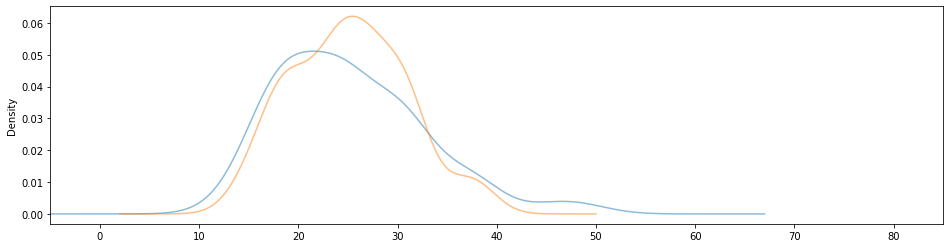

In [303]:
# Not sure how to lable this!!??
for door_type in [2, 4]:
  auto_df[auto_df['doors']==door_type]['city_mpg'].plot(kind='density', figsize=(16,4), alpha=0.5, xlim=(-5, 85));

<BarContainer object of 205 artists>

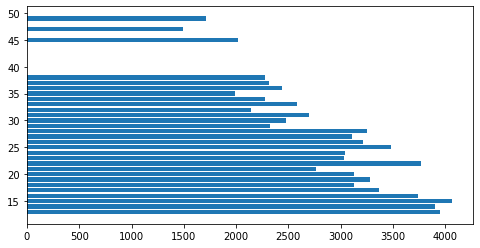

In [304]:
fig, ax = plt.subplots(figsize= (8,4))
ax.barh(auto_df['city_mpg'], auto_df['curb_weight'])

In [0]:
# DOESN'T WORK! with lines
fig, ax = plt.subplots(figsize= (8,4))
ax.lines(auto_df['city_mpg'], auto_df['curb_weight'])

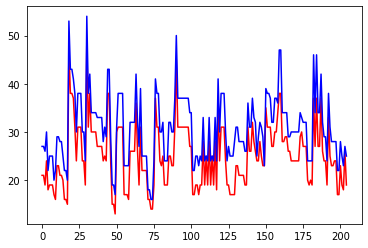

In [305]:
# City MPG is obviously LESS better on highway in BLUE
plt.plot(auto_df['city_mpg'], 'r')
plt.plot(auto_df['hgwy_mpg'], 'b')
plt.show()

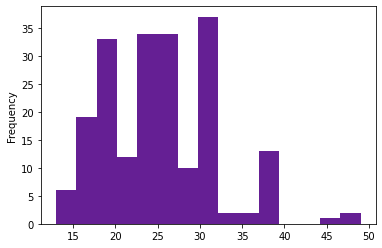

In [306]:
auto_df['city_mpg'].plot(kind='hist', bins=15, color='#651f94');

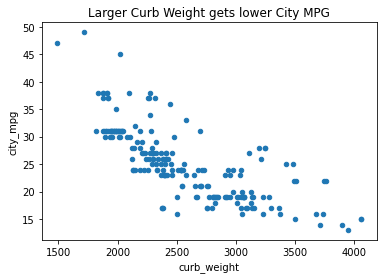

In [307]:
ax = auto_df.plot(kind='scatter', x='curb_weight' , y='city_mpg')
ax.set_title("Larger Curb Weight gets lower City MPG");

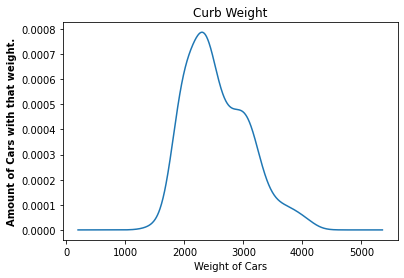

In [308]:
ax = auto_df['curb_weight'].plot.kde()
ax.set_title("Curb Weight");
ax.set_xlabel("Weight of Cars");
ax.set_ylabel("Amount of Cars with that weight.", fontweight="bold");

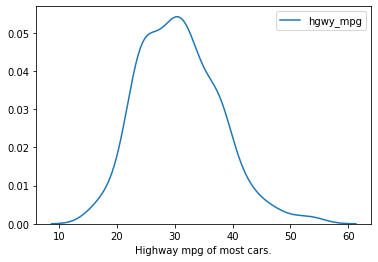

In [309]:
# Make default density plot
ax = sns.kdeplot(auto_df['hgwy_mpg'])
ax.set_xlabel("Highway mpg of most cars.");


Name a graph you would use for the following cases:
- Distribution
- Change Over Time
- Correlation

You may find the answers in the Resources section above or through Google

In [0]:
# Distribution is great for proportional understanding.  How many of a particular set.  THE MEAN. Or FREQUENCY.
# BOXPLOTs, KDE, SCATTERPLOT

In [0]:
# Change over time: 
# LINE, BAR, HIST, SCATTERPLOT

In [0]:
# Correlation:
# SUBPLOTS, CORRELATION MATRIX, STACKED BAR CHART, CROSSTAB BAR

# Crosstabs and Pivot Tables

Complete the following:
- Make a crosstab of two of the categorical features
 - In a sentence or two, explain how to read the table and what the values mean
 - Make a graph from the crosstab
- Make a crosstab with a categorical feature and `price`
 - Use `pd.cut` to create 5 bins for `price`
 - In a sentence or two, explain how to read the table and what the values mean
 - Make a graph from the crosstab
- Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)
 - In a sentence or two, explain how to read the table and what the values mean

In [310]:
# Compute a simple cross-tabulation of two (or more) factors. 
# By default computes a frequency table of the factors unless an array of values and an aggregation function are passed
style_engine = pd.crosstab(index=auto_df['bod_style'], columns=auto_df['engine'])
style_engine

engine,dohc,dohcv,l,ohc,ohcf,ohcv,rotor
bod_style,,,,,,,
convertible,2,0,0,2,1,1,0
hardtop,0,0,0,5,2,1,0
hatchback,4,1,1,53,3,4,4
sedan,5,0,7,73,5,6,0
wagon,1,0,4,15,4,1,0


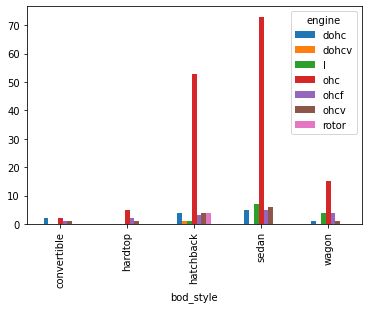

In [311]:
style_engine.plot(kind='bar');

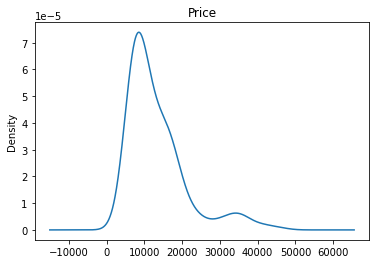

In [312]:
ax = auto_df['price'].plot.kde()
ax.set_title("Price");

In [313]:
auto_df['price'].describe()

count      205.000000
mean     13242.112195
std       7872.693982
min       5118.000000
25%       7788.000000
50%      10595.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

In [0]:
auto_df['price'] = auto_df['price'].astype(float).astype(int)

In [315]:
auto_df['price'].dtypes

dtype('int64')

In [0]:
# PD.CUT: Use to create groups of a particular variable of numeric dataType.
auto_df['Price_groups'] = pd.cut(auto_df.price, bins= [5000, 13000, 21000, 29000, 37000, 45500])

In [323]:
auto_df['Price_groups'].value_counts().head()

(5000, 13000]     126
(13000, 21000]     55
(29000, 37000]     10
(21000, 29000]     10
(37000, 45500]      4
Name: Price_groups, dtype: int64

In [331]:
# MUST USE 2 sets of square brackets and create a new data frame
two_columns_1 = auto_df[['bod_style', 'Price_groups']]
two_columns_1.sample(8)

,bod_style,Price_groups
118,hatchback,"(5000, 13000]"
40,sedan,"(5000, 13000]"
63,sedan,"(5000, 13000]"
68,wagon,"(21000, 29000]"
139,hatchback,"(5000, 13000]"
173,sedan,"(5000, 13000]"
74,hardtop,"(37000, 45500]"
25,sedan,"(5000, 13000]"


In [332]:
style_price = pd.crosstab(index=auto_df['bod_style'], columns=auto_df['Price_groups'])
style_price

Price_groups,"(5000, 13000]","(13000, 21000]","(21000, 29000]","(29000, 37000]","(37000, 45500]"
bod_style,,,,,
convertible,1,3,0,1,1
hardtop,4,0,1,2,1
hatchback,54,15,1,0,0
sedan,52,28,7,7,2
wagon,15,9,1,0,0


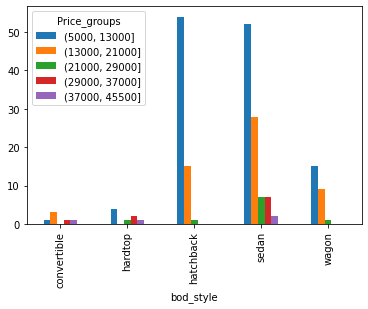

In [333]:
style_price.plot(kind='bar');

In [334]:
# Create a spreadsheet-style pivot table as a DataFrame. 
# The levels in the pivot table will be stored in MultiIndex objects ..
# (Hierarchical indexes on the index and columns of the result DataFrame
pd.pivot_table(auto_df, index='make', aggfunc='mean')
#Deleting aggfunc='mean' will yield the same value

,city_mpg,compression,curb_weight,doors,engine_size,height,hgwy_mpg,hp,hp_divided_by_price,length,price,symboling,wheel_base,width
make,,,,,,,,,,,,,,
alfa-romero,20.333333,9.000000,2639.666667,2.000000,137.333333,50.000000,26.666667,125.333333,0.008095,169.600000,15498.333333,2.333333,90.566667,64.566667
audi,18.857143,8.400000,2800.714286,3.428571,130.714286,54.428571,24.142857,121.000000,0.007096,183.828571,17450.714286,1.285714,102.271429,68.714286
bmw,19.375000,8.575000,2929.375000,3.250000,166.875000,54.825000,25.375000,138.875000,0.005475,184.500000,26118.750000,0.375000,103.162500,66.475000
chevrolet,41.000000,9.566667,1757.000000,2.666667,80.333333,52.400000,46.333333,62.666667,0.010362,151.933333,6007.000000,1.000000,92.466667,62.500000
dodge,28.000000,8.634444,2151.333333,3.111111,102.666667,51.644444,34.111111,86.333333,0.010963,160.988889,7875.444444,1.000000,95.011111,64.166667
honda,30.384615,9.215385,2096.769231,2.769231,99.307692,53.238462,35.461538,80.230769,0.010014,160.769231,8184.692308,0.615385,94.330769,64.384615
isuzu,31.000000,9.225000,2213.500000,3.000000,102.500000,52.225000,36.000000,77.000000,0.007244,163.775000,11958.250000,0.750000,94.825000,63.550000
jaguar,14.333333,9.233333,4027.333333,3.333333,280.666667,51.133333,18.333333,204.666667,0.005895,196.966667,34600.000000,0.000000,109.333333,69.933333
mazda,25.705882,10.488235,2297.823529,2.941176,103.000000,53.358824,31.941176,85.529412,0.008635,170.805882,10652.882353,1.117647,97.017647,65.588235


In [335]:
# ABOVE explained: With just the bare minimum the numerical values are automatically filled..
# while the non-numerical values are omitted. Each cell is the averages/mean of the car’s MPG and Price. 
# The default aggfunc is mean
# WOULD CREATE MULTIPLE INDEXES:
pd.pivot_table(auto_df, index=['make', 'peak_rpm'], values='price', aggfunc='mean')
# for the aggfunc you can have different things like sum etc.  I chose average price.

price
make          peak_rpm              
alfa-romero   5000      15498.333333
audi          5500      17450.714286
bmw           4250      22213.333333
              5400      36318.333333
              5800      16677.500000
chevrolet     5100       5151.000000
              5400       6435.000000
dodge         5000      10942.500000
              5500       6999.142857
honda         4800       6479.000000
              5500       7872.000000
              5800       9815.000000
              6000       7020.600000
isuzu         4800       6785.000000
              5000      11048.000000
              5400      15000.000000
jaguar        4750      33900.000000
              5000      36000.000000
mazda         4200      18344.000000
              4650      10795.000000
              4800       9885.000000
              5000       8409.166667
              6000      13020.000000
mercedes-benz 4350      28394.000000
              4500      43180.000000
              4750      34620.000000
mercury       5000      16503.000000
mitsubishi    5000      10944.000000
              5500       7779.000000
nissan        4800       7099.000000
              5200      10610.764706
peugot        4150      15797.000000
              5000      14649.000000
              5600      18150.000000
plymouth      5000      10842.500000
              5500       6811.800000
porsche       5500      22018.000000
              5750      15000.000000
              5900      34528.000000
renault       5000       9595.000000
saab          5250      13642.500000
              5500      18385.000000
subaru        4400       7477.000000
              4800       9131.333333
              4900       5118.000000
              5200      10079.000000
toyota        4200      10270.500000
              4500       8794.666667
              4800       8739.368421
              5200      15999.000000
              6600       9418.000000
volkswagen    4500      11670.000000
              4800       7885.000000
              5250       8221.666667
              5500      11431.000000
volvo         4800      22470.000000
              5100      18685.000000
              5300      19045.000000
              5400      16387.500000
              5500      21485.000000

# Interpretations

Write a short paragraph explaining some of the things you learned from the dataset. Avoid low hanging fruit like simply writing about the different descriptive stats. Focus on interesting relationships between columns, what you see in the graphs, etc.

In [0]:
# I learned the most popular type of engine.  I learned the most common price range.  Learned that of course better mpg comes with a lighter vehicle.
# The data set was pretty well put together and had a lot to say about different kinds of vehicles.

# Tidy and Join

Combine `df_a`, `df_b`, and `df_c` joining on the ids in `df_a` to reveal the real names of The Hulk, Spiderman, and Superman.

In [345]:
# I just had to make sure there was a common column name on the merges.
df_a = pd.DataFrame({'id_b':[1,2,3], 'id_c': [4,5,6]})
df_a

,id_b,id_c
0,1,4
1,2,5
2,3,6


In [346]:
df_b = pd.DataFrame({'id_b':[1,2,3], 'first_name': ['Bruce', 'Peter', 'Clark']})
df_b

,id_b,first_name
0,1,Bruce
1,2,Peter
2,3,Clark


In [347]:
df_c = pd.DataFrame({'id_c': [4,5,6], 'last_name': ['Banner', 'Parker', 'Kent']})
df_c

,id_c,last_name
0,4,Banner
1,5,Parker
2,6,Kent


In [348]:
a_b_merge_df = pd.merge(df_a, df_b)
a_b_merge_df

,id_b,id_c,first_name
0,1,4,Bruce
1,2,5,Peter
2,3,6,Clark


In [349]:
# WORKS!
a_b_c_merge_df = pd.merge(a_b_merge_df, df_c)
a_b_c_merge_df

,id_b,id_c,first_name,last_name
0,1,4,Bruce,Banner
1,2,5,Peter,Parker
2,3,6,Clark,Kent


Use `melt` to change the dataframe below to look like the image below.

In [393]:
# I think there is something wrong with the beginning data set here.
# DOESN'T WORK at least not in this format.
# THIS DIDN'T give the 'make this'
messy = pd.DataFrame({'a': ['A', 'B', 'C'], 
                      'b': [1, 2, 3],
                      'c': [4, 5, 6],
                      'd': [7, 8, 9]})

messy

,a,b,c,d
0,A,1,4,7
1,B,2,5,8
2,C,3,6,9


In [0]:
# WORKED? THIS RESULTED in the 'make this.'
# I had to re-organize the DataFrame to get the correct answer?
index=['A', 'B', 'C']
columns=['b', 'c', 'd']

In [394]:
messy2 = pd.DataFrame(
    [[1, 4, 7],
     [2, 5, 8],
     [3, 6, 9]],
     index=['A', 'B', 'C'],
     columns= ['b','c','d']
)
messy2

,b,c,d
A,1,4,7
B,2,5,8
C,3,6,9


Make this:

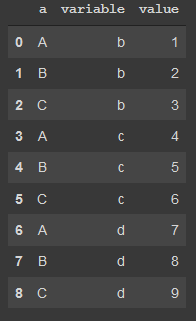

In [389]:
# First, get the column names as a list.
messy2.columns.tolist()

['b', 'c', 'd']

In [390]:
# Now get the index values as another list.
messy2.index.tolist()

['A', 'B', 'C']

In [391]:
# For table 1, convert the index into a column using the `reset_index` method.
messy_table = messy2.reset_index(drop=False)
messy_table

,index,b,c,d
0,A,1,4,7
1,B,2,5,8
2,C,3,6,9


In [392]:
# Convert the table from 'wide' to 'tidy' format using the `melt` method.
tidy = messy_table.melt(id_vars = 'index',
                       value_vars = ['b', 'c', 'd']
                       )
tidy

,index,variable,value
0,A,b,1
1,B,b,2
2,C,b,3
3,A,c,4
4,B,c,5
5,C,c,6
6,A,d,7
7,B,d,8
8,C,d,9


In a sentence or two, explain what the tidy data format is.

In [0]:
# Tidy datasets are easy to manipulate, model and visualize, and have a specific structure: 
# each column is a variable, each row is an observation, and each type of observational unit is a table.

What are the types of joins?

In [0]:
# LEFT, FULL OUTER, LEFT JOIN(if NULL), INNER, RIGHT, RIGHT(if NULL)

# Snazzy Graphs

Pick a graph from FiveThirtyEight and try to recreate it. Focus on the following items:
- All text in the orginal graph (except the watermark) is present in your graph and in the same locations
- All text in your graph is roughly the same size and look of the original graph
- Gridlines, Ticklabels, and tickmark spacing matches
- Coloring and/or style matches.